# Import libraries

In [28]:
import time
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from constants import *

from sklearn import datasets
from sklearn.mixture import GaussianMixture as GMM
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import KMeans,AffinityPropagation

import warnings
from constants import *
import math
import seaborn as sns
import random
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import dill

# Helper Functions

In [ ]:
def plot_BIC(list_k, BIC_score,variance):
    fig = plt.subplot(111)
    plt.plot(list_k, BIC_score, marker='o')  
    plt.xlabel('Value of K')
    plt.ylabel('Objective')
    title = 'BIC for '+ variance
    plt.title(title)
    plt.show() 

# Datasets

In [52]:
df_3points = pd.read_csv('../Data/cleaned.txt', sep=",")
print("Dataset size is",len(df_main))
print(df_3points.head(5))
X_3points = np.log2(df_3points.values)

Dataset size is 11087
     cdRPKM0    cdRPKM1    cdRPKM2
0   8.539825   5.879642   5.990043
1  13.837680   4.128452   6.882499
2  39.456786  62.505536  84.519655
3   2.104887   3.488833   2.908098
4  10.010800  17.066902   9.484017


In [55]:
df_5points_RNASeq = pd.read_csv('RPKMOutput/RNASeq.txt', sep="\t")
print("Dataset size is",len(df_main))
print(df_5points_RNASeq[['cdRPKM0', 'cdRPKM1', 'cdRPKM2', 'cdRPKM3', 'cdRPKM4']].head(5))
X_5points_RNASeq = np.log2(df_5points_RNASeq[['cdRPKM0', 'cdRPKM1', 'cdRPKM2', 'cdRPKM3', 'cdRPKM4']].values)

Dataset size is 11087
     cdRPKM0    cdRPKM1    cdRPKM2    cdRPKM3    cdRPKM4
0   6.642349   5.591876   6.004645   5.369988   8.507454
1   0.421957   0.429708   0.201468   0.426413   0.397381
2   8.115351   9.879314   9.263817   7.164127   7.730539
3  54.937502  55.371390  64.913315  67.172940  78.293873
4   1.206070   1.252307   0.451649   0.860333   1.781686


# Determine optimal K for different covariance settings

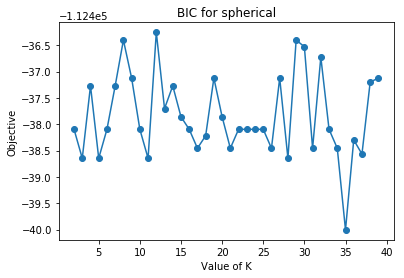

Max BIC occurs at K = 10


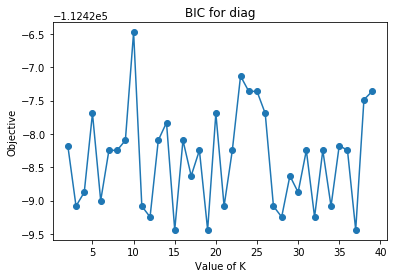

Max BIC occurs at K = 8


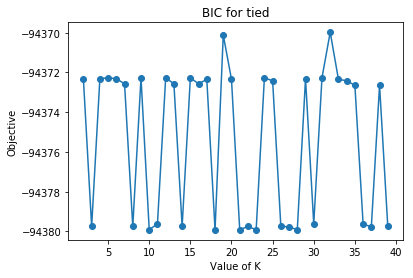

Max BIC occurs at K = 30


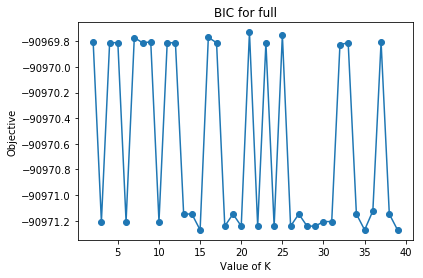

Max BIC occurs at K = 19


In [39]:

list_k = range(2,40)
variances = ['spherical','diag','tied','full']
for var in variances:
    BIC_score = []
    for i in list_k:
        gmm = GMM(n_components=3, covariance_type=var)
        gmm.fit(X)
        BIC_score.append(-gmm.bic(X))
    plot_BIC(list_k,BIC_score,var)
    print("Max BIC occurs at K =",BIC_score.index(max(BIC_score)))

# Plot for diag

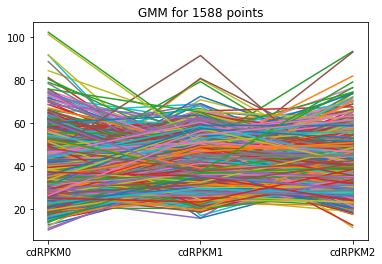

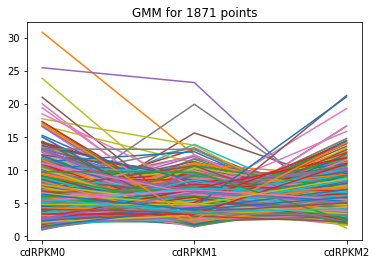

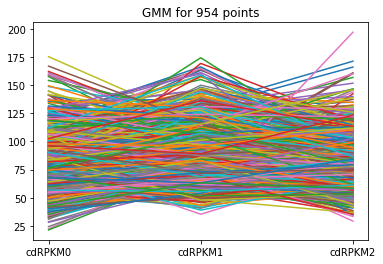

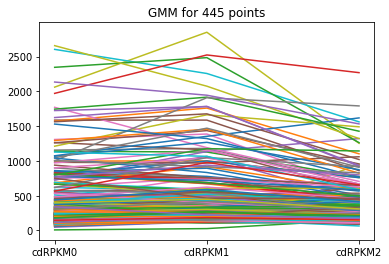

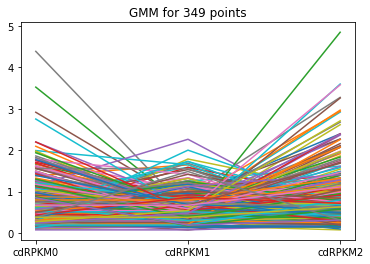

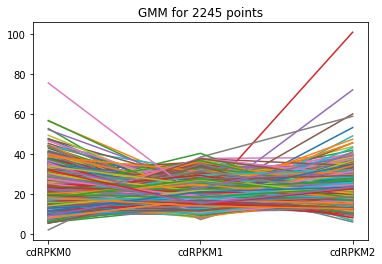

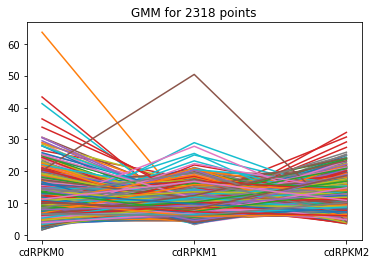

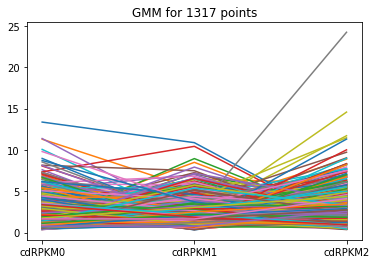

In [43]:
gmm = GMM(n_components=8, covariance_type='diag')
gmm.fit(X)
K = 8 #insert K here
X_predicted = [ [] for i in range(K)]
for x in X:
    X_predicted[gmm.predict([x])[0]].append([x])
var_plot_list = CDRPKM_LIST
for cluster in X_predicted:
    fig = plt.subplot(111)
    for points in cluster:
        fig.plot(var_plot_list, np.power([2,2,2],points[0]))
    title = "GMM for "+str(len(cluster)) + " points"
    plt.title(title)
    plt.show()